AAI-500 Final Project 

Hassan Ali, Jack Baxter

Predicting Work Life Balance Scores For Men 

Dataset: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data?resource=download

In [3]:
#necessary libraries for project
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
#imort kaggle csv
wlb_datapath = '/Users/jackbaxter/Desktop/Wellbeing_and_lifestyle_data_Kaggle.csv'
wlb = pd.read_csv(wlb_datapath)
cols = wlb.columns

In [5]:
#module one data inspection, cleaning, descriptive stats
wlb.info()
wlb.isnull().sum()
#using only male entries
wlb = wlb[wlb['GENDER'] == 'Male']
#conversion of non-integer datavalues to integer values for quantitative analysis 
wlb['DAILY_STRESS'] = pd.to_numeric(wlb['DAILY_STRESS'], errors='coerce')
wlb.dropna(subset=['DAILY_STRESS'], inplace=True)
#dropping columns that are not consistent with data formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [6]:
#clean data by dropping variables that are not int64 type for compatibility
wlb.drop('AGE', axis=1, inplace=True)
wlb.drop('Timestamp', axis=1, inplace=True)
wlb.drop('GENDER', axis=1, inplace=True)

In [7]:
#create test and training sets for the original random forest classifier
#bootstrap method with replacement, frac - 1.0 
vars_train = wlb.sample(frac=1.0,replace=True,random_state=42)
vars_test = wlb.drop(vars_train.index)
wlb_train = vars_train['WORK_LIFE_BALANCE_SCORE']
vars_train.drop('WORK_LIFE_BALANCE_SCORE', axis=1, inplace=True)
wlb_test = vars_test['WORK_LIFE_BALANCE_SCORE']
vars_test.drop('WORK_LIFE_BALANCE_SCORE', axis=1, inplace=True)
cols = vars_train.columns
cols2 = vars_train.columns

In [8]:
#create the master random forest predictor 
forest = RandomForestRegressor(n_estimators=100,random_state=42)
forest.fit(vars_train,wlb_train)

RandomForestRegressor(random_state=42)

In [9]:
#generate wlb prediction values using the forest 
preds = forest.predict(vars_test)

In [10]:
#calculate mse and r2 evaluation metrics for the original forest 
mean_error_val=mean_squared_error(wlb_test,preds)
r2score = r2_score(wlb_test,preds)
print(mean_error_val,r2score)

158.31500920922255 0.9266950895642901


In [11]:
#create estimator for graphing
estimator = forest.estimators_[1]

In [13]:
#generate random forest graph 
graphdata = export_graphviz(estimator, 
                           out_file=None, 
                           feature_names=cols2, 
                           class_names=['WORK_LIFE_BALANCE_SCORE'], 
                           rounded=True, 
                           proportion=False, 
                           precision=2, 
                           filled=True)
graph = graphviz.Source(graphdata)

In [14]:
graph

In [15]:
#garner importance data of variables utilized in RF generator 
importance = forest.feature_importances_
importanceframe = pd.DataFrame({'Feature': cols, 'Importance': importance})
importanceframe = importanceframe.sort_values(by='Importance', ascending=False)
print(importanceframe)

              Feature  Importance
6         ACHIEVEMENT    0.262568
9      TODO_COMPLETED    0.100581
4   SUPPORTING_OTHERS    0.099828
2      PLACES_VISITED    0.078880
16  SUFFICIENT_INCOME    0.057212
3         CORE_CIRCLE    0.037634
12        LIVE_VISION    0.036805
18   TIME_FOR_PASSION    0.036579
11        DAILY_STEPS    0.035602
19  WEEKLY_MEDITATION    0.030693
10               FLOW    0.028581
14      LOST_VACATION    0.028550
17    PERSONAL_AWARDS    0.028186
0      FRUITS_VEGGIES    0.024837
1        DAILY_STRESS    0.024413
7            DONATION    0.024165
5      SOCIAL_NETWORK    0.019795
8           BMI_RANGE    0.018898
15     DAILY_SHOUTING    0.016398
13        SLEEP_HOURS    0.009792


Correlation Matrix:



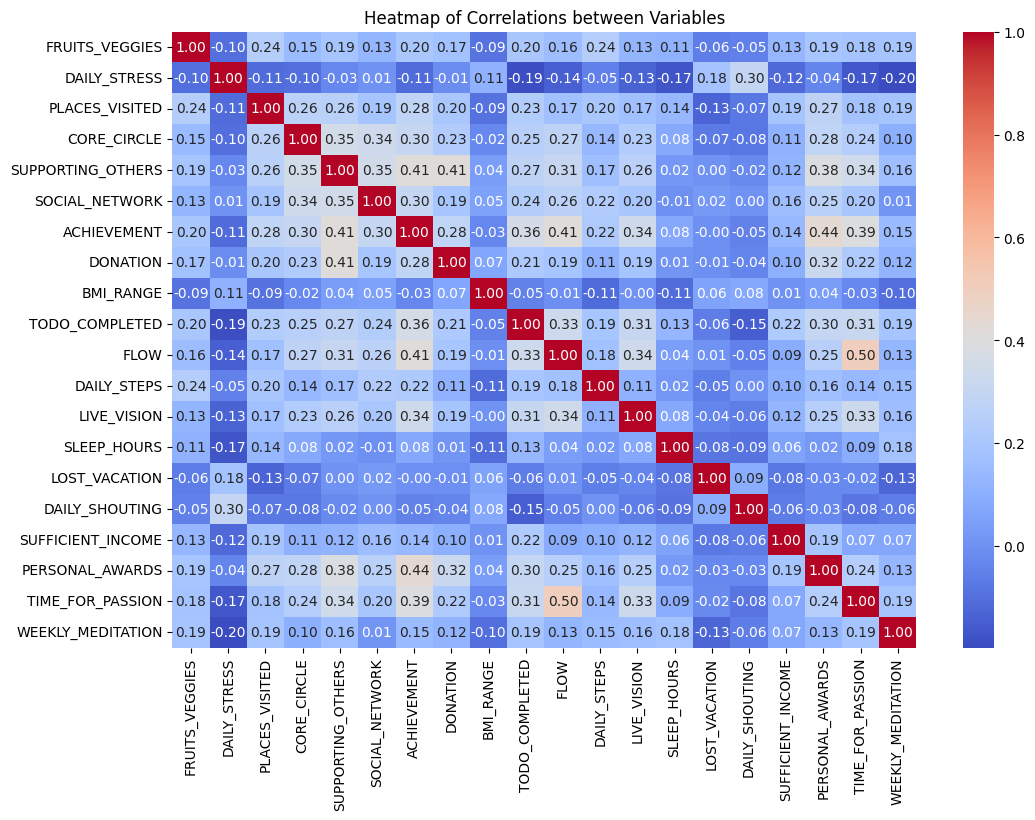

In [16]:
#double check with the regression results to confirm importance variables
print("Correlation Matrix:\n")
numeric_df = wlb[cols].select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Heatmap of Correlations between Variables")
plt.show()

count    6113.000000
mean        4.002781
std         2.813317
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: ACHIEVEMENT, dtype: float64

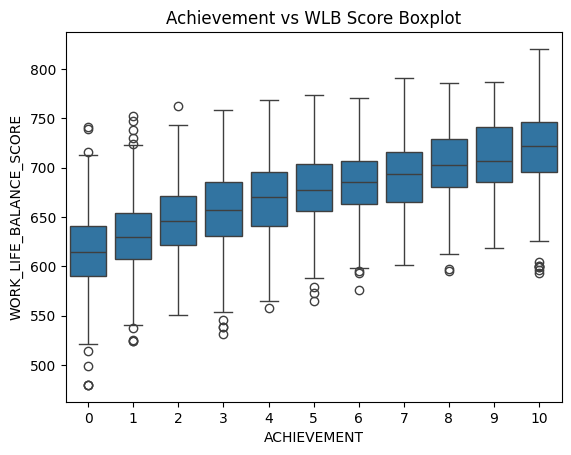

In [17]:
#exploration of significant variables 
#Achievement
sns.boxplot(x='ACHIEVEMENT', y='WORK_LIFE_BALANCE_SCORE', data=wlb)
plt.title('Achievement vs WLB Score Boxplot')
wlb['ACHIEVEMENT'].describe()

count    6113.000000
mean        5.474726
std         2.670506
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: TODO_COMPLETED, dtype: float64

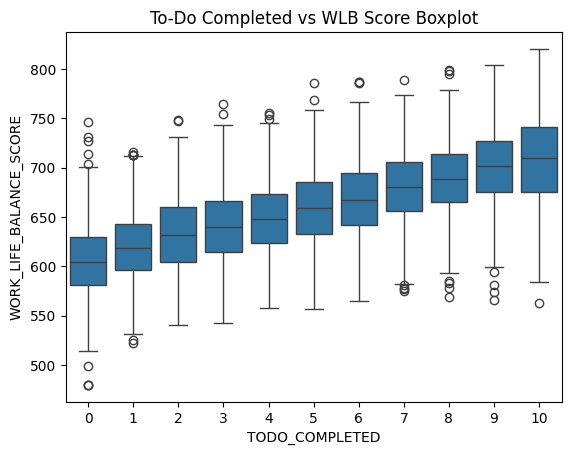

In [18]:
#todo-completed
sns.boxplot(x='TODO_COMPLETED', y='WORK_LIFE_BALANCE_SCORE', data=wlb)
plt.title('To-Do Completed vs WLB Score Boxplot')
wlb['TODO_COMPLETED'].describe()

count    6113.000000
mean        5.074922
std         3.291859
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: SUPPORTING_OTHERS, dtype: float64

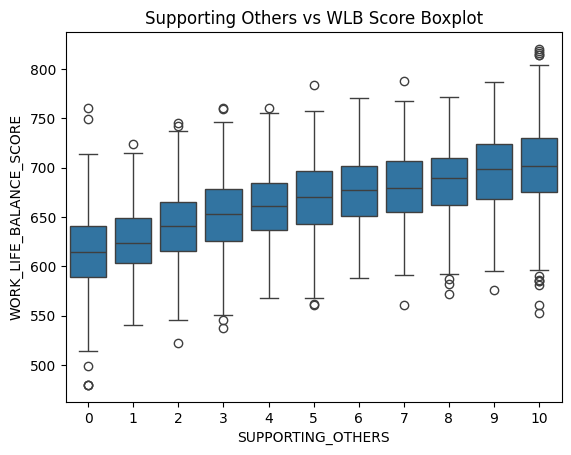

In [19]:
#supporting_others
sns.boxplot(x='SUPPORTING_OTHERS', y='WORK_LIFE_BALANCE_SCORE', data=wlb)
plt.title('Supporting Others vs WLB Score Boxplot')
wlb['SUPPORTING_OTHERS'].describe()

count    6113.000000
mean        5.053820
std         3.298602
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: PLACES_VISITED, dtype: float64

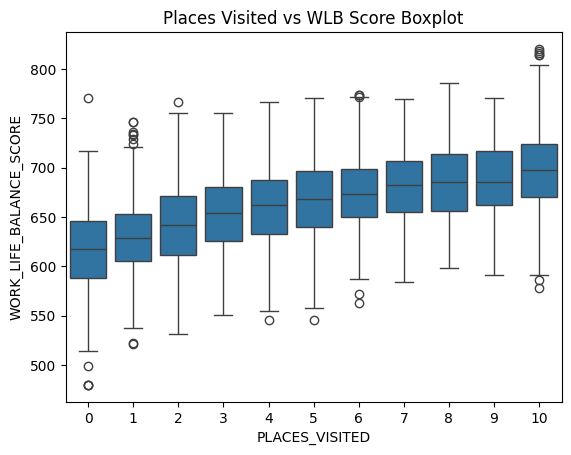

In [20]:
#places visited
sns.boxplot(x='PLACES_VISITED', y='WORK_LIFE_BALANCE_SCORE', data=wlb)
plt.title('Places Visited vs WLB Score Boxplot')
wlb['PLACES_VISITED'].describe()

count    6113.000000
mean        1.734827
std         0.441461
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: SUFFICIENT_INCOME, dtype: float64

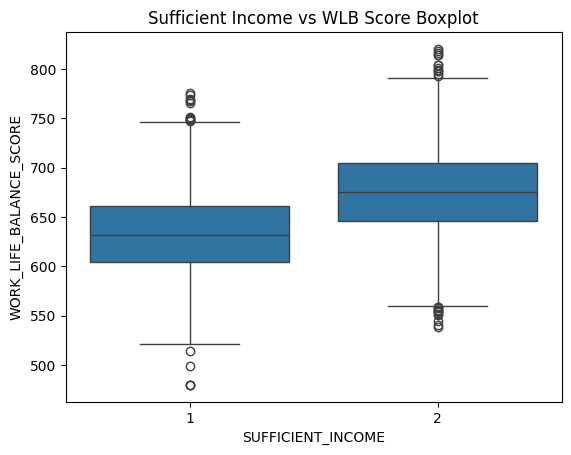

In [21]:
#sufficient income
sns.boxplot(x='SUFFICIENT_INCOME', y='WORK_LIFE_BALANCE_SCORE', data=wlb)
plt.title('Sufficient Income vs WLB Score Boxplot')
wlb['SUFFICIENT_INCOME'].describe()